In [2]:
!pip install pennylane -q

## Zadanie

Utwórz obwód kwantowy i dodaj parametryzowaną bramkę $R_x$ z kątem ustawionym jako `pi/4`

Oblicz wartość oczekiwaną operatora $<\sigma_z>$ wykorzystując `qml.expval(qml.PauliZ(0))`


Bramka (i operator) Z, w bazie obliczeniowej dany jest macierzą:
$$
 \textbf{Z} = \begin{bmatrix} 1 \,\,\,\,\,\,\,\, 0 \\ 0 \,\, -1 \end{bmatrix} 
 $$

Operator ten mierzy różnicę pomiędzy prawdopodobieństwem, że kubit jest w stanie $\ket{0}$ a prawdopodobieństwem, że jest w stanie $\ket{1}$

W ogólności wartość oczekiwana (wartość średnia wyniku pomiaru w bazie operatora Z) dana jest wzorem: 
$$
 \textbf{<Z>} = \bra{\psi} \textbf{Z} \ket{\psi} 
$$

Niech 
$$
\ket{\psi} = \alpha\ket{0} + \beta\ket{1} 
$$
wtedy 
$$
\bra{\psi} = \alpha^*\bra{0} + \beta^*\bra{1} 
$$

Możemy obliczyć: 
$$
\bra{\psi} \textbf{Z} \ket{\psi}  = (\alpha^*\bra{0} + \beta^*\bra{1} ) \,\,\, Z \,\,\,(\alpha\ket{0} + \beta\ket{1}) = |\alpha|^2 - |\beta|^2
$$
Czyli dla kubitu w stanie $\ket{0}$ 
$$
 \textbf{<Z>} = 1  
$$
Dla kubitu w stanie $\ket{1}$
$$
 \textbf{<Z>} = -1  
$$
Dla kubitu w superpozycji $\ket{0} +\ket{1}$
$$
 \textbf{<Z>} = 0  
$$

In [13]:
import pennylane as qml
from pennylane import numpy as np

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def qc():
    qml.RZ(np.pi/2, wires=0)
    #qml.Hadamard(wires=0)
    return qml.expval(qml.PauliZ(0))

In [14]:
qc()

1.0

## Zadanie -  Obwód kwantowy z optymalizacją

- Napisz nowy obwód kwantowy, który zawierać będzie tylko bramkę $R_X$ dla dowolnego parametru $\theta$
- oblicz i uzasadnij, że wartość oczekiwana dla stanu $\ket{\psi} = R_X \, \ket{0}$ 
$$<Z> = cos^2(\theta /2)- sin^2(\theta /2) = cos(\theta)$$


Załóżmy, że nasz problem obliczeniowy sprowadza się do wygenerowania wartości oczekiwanej o wartości 0.5. 

$$
 \textbf{<Z>} = \bra{\psi} \textbf{Z} \ket{\psi} = 0.5
 $$

 

Napisz program znajdujący rozwiązanie - szukający wagę $\theta$ dla naszego obwodu

- Zdefiniuj funkcję kosztu, którą bedziemy minimalizować $(Y - y)^2$
- zainicjuj rozwiązanie $theta=0.01$ i przypisz do tablicy array `np.array(0.01, requires_grad=True)`
- Jako opt wybierz spadek po gradiencie : opt = qml.GradientDescentOptimizer(stepsize=0.1)
- uzyj poniższego kodu do wygenerowania pętli obiczeń 

```python

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")
```

## Bramki dwukubitowe

$$
\renewcommand{\bra}[1]{\left \langle #1 \right \rvert}
\renewcommand{\ket}[1]{\left \rvert #1 \right \rangle}
\renewcommand{\braket}[2]{\left \langle #1 \middle \rvert #2 \right \rangle}
$$


[O bramkach dwukubitowych wspominaliśmy juz tutaj](https://sebkaz-teaching.github.io/qml2024/lectures/wyklad4.html#bramki-dwukubitowe)

Jedną z bramek realizującą zadania  na dwóch kubitach jest bramka CNOT, która na bazie bitu kontrolnego decyduje czy zastosować operację X do drugiego kubitu.

$$
\text{CNOT} = \begin{bmatrix} 1 \,\, \,\,\, 0 \,\,\,\,\, 0 \,\,\,\,\, 0 \\ 
0\,\, \,\,\, 1 \,\,\,\,\, 0 \,\,\,\,\, 0 \\
0\,\,\,\,\, 0\,\,\,\,\,  0 \,\,\,\,\, 1 \\ 0\,\,\,\,\, 0\,\,\,\,\, 1\,\,\,\,\, 0 \end{bmatrix}
$$

$$ \text{CNOT} \ket{00} = \ket{00} $$

$$ \text{CNOT} \ket{10} = \ket{11} $$

In [17]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    # qml.Hadamard(wires=0)
    qml.X(wires=0)
    qml.CNOT(wires=[0,1])
    #return qml.state()
    return qml.counts()

qc()

{'11': 100}

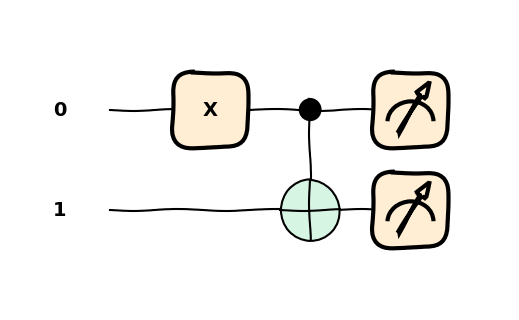

In [18]:
import matplotlib.pyplot as plt
qml.drawer.use_style("sketch")
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [19]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'01': 52, '10': 48}

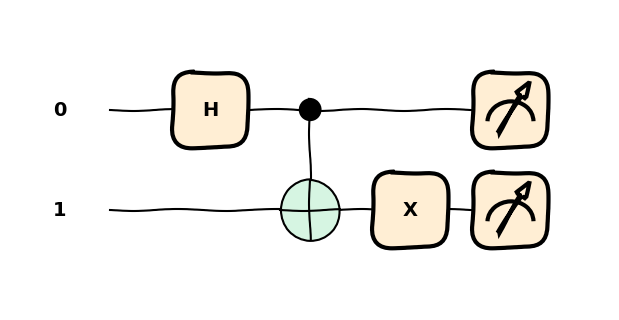

In [20]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [21]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.Z(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'00': 52, '11': 48}

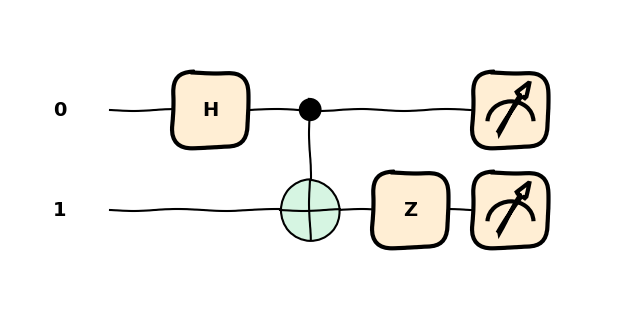

In [22]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [23]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=2, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.X(wires=1)
    qml.Z(wires=1)
    #return qml.state()
    return qml.counts()

qc()

{'01': 48, '10': 52}

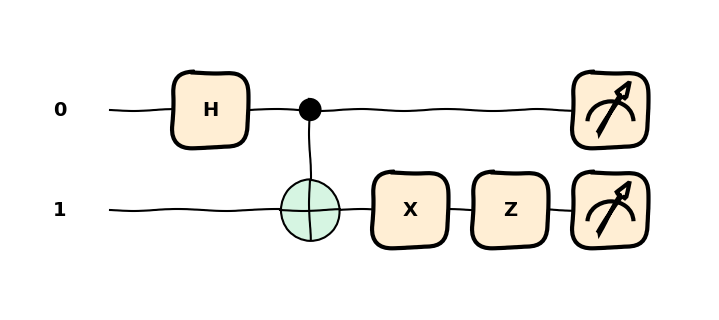

In [24]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

## Zadanie 

utwórz obwód dwu kubitowy:
- bramka CNOT 0,1
- bramka CNOT (odwrocona) 1,0
- bramka CNOT 0,1

Opisz jak działa ta kombinacja na stany: $\ket{00}, \ket{11}, \ket{01},\ket{10}$

Znajdź odpowiednik tej kombinacji w bibliotece Pennylane.

## Zadanie 

utwórz obwód dwu kubitowy:
- bramka CNOT
- bramki H na kazdym kubicie
- bramka CNOT 
- bramki H na kazdym kubicie
- bramka CNOT

## Stany GHZ 

Jak realizują się stany splątane dla więcej niz dwóch kubitów

Stany [Greenbergerha-Hornea-Zeilingera](https://en.wikipedia.org/wiki/Greenberger–Horne–Zeilinger_state)


[publikacja](https://arxiv.org/abs/2106.01550)

In [25]:
dev = qml.device('default.qubit', wires=3, shots=100)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    #return qml.state()
    return qml.counts()

qc()

{'000': 51, '111': 49}

## Kopiowanie Kubitu 

Klasyczne komputery bardzo często wykorzystując operację kopiowania. 

Zobaczmy jak taka operacja wygląda dla kubitów.

Rozwazmy obwod z operatorem `C`, który w działaniu na dwa kubity kopiuje wartość pierwszego kubitu na wynik drugiego. 
Drugi kubit mozna na początku ustawić w dowolnym stanie. 

Chcemy skopiować stan $\ket{\psi_0} = a\ket{0} + b\ket{1}$ 

Stan początkowy układu: $\ket{\psi_0} \otimes \ket{0}$

Chcemy przekształcić na $\ket{\psi_0} \otimes \ket{\psi_0}$ czyli 

$$ 
C \left(\ket{\psi_0} \otimes \ket{0}\right) = \ket{\psi_0} \otimes \ket{\psi_0}
$$

Lewa strona

$$ 
C \left(\ket{\psi_0} \otimes \ket{0}\right) = C\left(   (a\ket{0} + b\ket{1} )  \otimes \ket{0} \right)
$$
$$ 
C\left( a\ket{0} \otimes \ket{0} + b\ket{1}\otimes \ket{0} \right) = a C \left(\ket{0} \otimes \ket{0}\right) + b C \left( \ket{1}\otimes \ket{0}\right)
$$
$$ 
a \ket{00} + b \ket{11}
$$

Prawa strona
$$
\ket{\psi_0} \otimes \ket{\psi_0}  = a^2 \ket{00} + ab\ket{01} + ab\ket{10} + b^2\ket{11}
$$ 

## Zadanie 

### Napisz operator 1+1 na układzie 4 kubitów 

$$
0+0 = 00
$$
$$
0+1 = 01
$$
$$
1+0 = 01
$$
$$
1+1 = 10
$$

zauwaz, ze mamy dwa typy rozwiązań: 

- dwa bity wejsciowe są takie same  (00, 11) i dają na prawym bicie odpowiedzi 0. 
- dwa bity wejsciowe są rózne (10,01) i dają na prawym bicie odpowiedzi 1. 


Aby napisać prawidłowe rozwiązanie musimy stworzyć bramki, które będą rozpoznawać czy dwa kubity są takie same czy tez rózne. Dla przypomnienia - klasycznie rolę taką pełni bramka `XOR`.

| Input 1   | Input 2 | XOR |
| -------- | ------- |--------|
| 0  | 0    |  0|
| 0 | 1    | 1  |
| 1   | 1    | 1 |
| 1   |  0 | 0 |

Podobnie działa bramka CNOT 

In [27]:
dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc(input='00'):
    if input[0]=='1':
        qml.X(wires=0)
    if input[1]=='1':
        qml.X(wires=1)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[1,3])
    #return qml.state()
    return qml.counts(wires=[2,3])

qc()

{'00': 1}

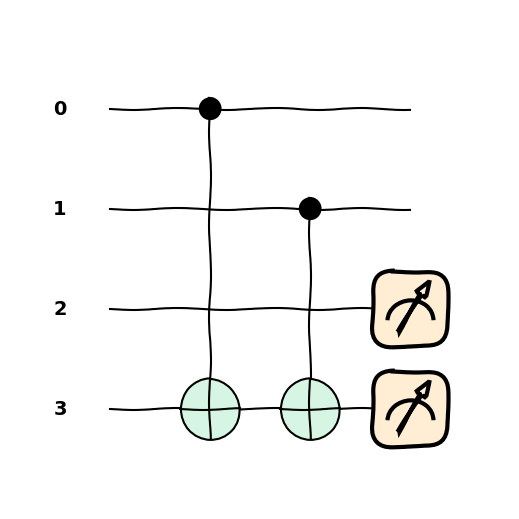

In [28]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [29]:
for input in ['00','01','10','11']:
    print(f"wartosci poczatkowe: {input} : wynik {qc(input)}")

wartosci poczatkowe: 00 : wynik {'00': 1}
wartosci poczatkowe: 01 : wynik {'01': 1}
wartosci poczatkowe: 10 : wynik {'01': 1}
wartosci poczatkowe: 11 : wynik {'00': 1}


Zastosowanie dwóch CNOT do inputów rozwiązuje nam problem prawego bitu odpowiedzi. 

Co z pierszym bitem odpowiedzi otrzymywanym po pomiarzze `q3` ? 

- jego wartość dla pierwszych trzech równań zawsze wynosi 0. 

Jednak dla równania 1+1 powinniśmy otrzymać 1. 

Do rozwiązania tego problemu mozna wykorzystać bramkę operującą na 3 kubitach. 
Bramka ta to bramka `Toffoli`. 

In [30]:
dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc(input='00'):
    if input[0]=='1':
        qml.X(wires=0)
    if input[1]=='1':
        qml.X(wires=1)
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[1,3])
    qml.Toffoli(wires=[0,1,2])
    #return qml.state()
    return qml.counts(wires=[2,3])

In [31]:
for input in ['00','01','10','11']:
    print(f"wartosci poczatkowe: {input} : wynik {qc(input)}")

wartosci poczatkowe: 00 : wynik {'00': 1}
wartosci poczatkowe: 01 : wynik {'01': 1}
wartosci poczatkowe: 10 : wynik {'01': 1}
wartosci poczatkowe: 11 : wynik {'10': 1}


In [33]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=4, shots=1)

@qml.qnode(dev)
def qc():
    qml.X(wires=0)
    qml.X(wires=1)
    qml.CNOT([0,1])
    qml.CNOT([0,2])
    qml.Toffoli([0,1,3])
    return qml.counts(wires=[2,3])

qc()

print("wynik 1+1 =",int('10', 2))

wynik 1+1 = 2


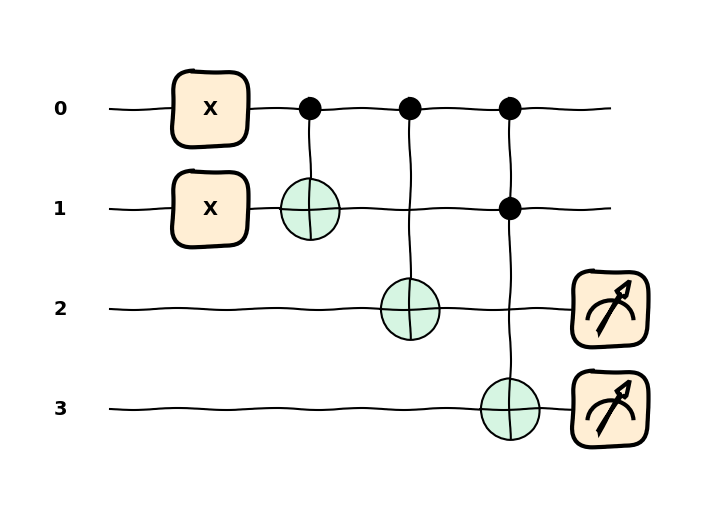

In [34]:
fig, ax = qml.draw_mpl(qc)()
plt.show()

In [35]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev)
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))


def cost_fn(theta):
    return (par_c(theta) - 0.5)**2

theta = np.array(0.01, requires_grad=True)

opt = qml.GradientDescentOptimizer(stepsize=0.1)

epochs = 100

for epoch in range(epochs):
    theta = opt.step(cost_fn, theta)

    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

print(f"Optymalizacja zakonczona dla theta={theta}, koszt: {cost_fn(theta)}")

epoka: 0, theta: 0.010999883335916642, koszt: 0.24993950555333252
epoka: 10, theta: 0.028520883980330904, koszt: 0.2495934725570593
epoka: 20, theta: 0.07380240366299132, koszt: 0.24728524869432472
epoka: 30, theta: 0.18848123038996684, koszt: 0.23260358196368314
epoka: 40, theta: 0.44553231822816797, koszt: 0.1619107886095973
epoka: 50, theta: 0.7954652635692223, koszt: 0.03998102446252434
epoka: 60, theta: 0.9838691671205075, koszt: 0.002894983645374295
epoka: 70, theta: 1.0340365114010706, koszt: 0.00012891702079013254
epoka: 80, theta: 1.0445781695789977, koszt: 5.138079127884816e-06
epoka: 90, theta: 1.0466807535250837, koszt: 2.002500944777545e-07
Optymalizacja zakonczona dla theta=1.0470778036429096, koszt: 1.0753863888581739e-08


In [36]:
import pennylane as qml
from pennylane import numpy as np 

dev = qml.device('default.qubit', wires=1)

@qml.qnode(dev, interface="torch")
def par_c(theta):
    qml.RX(theta, wires=0)
    return qml.expval(qml.PauliZ(0))



def cost_fn(theta):
    target = 0.5
    return (par_c(theta) - target) ** 2


import torch
from torch.optim import Adam 

theta = torch.tensor(0.01, requires_grad=True)

optimizer = Adam([theta], lr=0.1)
epochs = 100

for epoch in range(epochs):
    optimizer.zero_grad()
    loss = cost_fn(theta)
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f"epoka: {epoch}, theta: {theta}, koszt: {cost_fn(theta)}")

epoka: 0, theta: 0.1099998950958252, koszt: 0.24399264908423596
epoka: 10, theta: 1.0454959869384766, koszt: 2.169397961785511e-06
epoka: 20, theta: 1.0966185331344604, koszt: 0.0018829406574578545
epoka: 30, theta: 0.9526112675666809, koszt: 0.00632932142827247
epoka: 40, theta: 1.1116493940353394, koszt: 0.003228104542974554
epoka: 50, theta: 1.0076401233673096, koszt: 0.0011463386908574828
epoka: 60, theta: 1.069031834602356, koszt: 0.00036201344599675586
epoka: 70, theta: 1.0343400239944458, koszt: 0.0001230616125226832
epoka: 80, theta: 1.054998517036438, koszt: 4.584636654614166e-05
epoka: 90, theta: 1.0422117710113525, koszt: 1.8589767098546092e-05
